# Paper 3 (Linear stability analysis plots)
2022-03-17 Version 0.1

In [4]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math

## Square well free energy

In [5]:
# Define the fixed concentration scale phi = r_0/alpha,
# so that rho = (N/V) sigma^3 is given as rho = phi * c.

# Parameter phi = r_0/alpha = 8.0/7.0 approximately, according
# to the Paper 2 analysis of the decrease of the clearing point temperature
# with increasing nanoparticle volume fraction.

phi = 8.0/7.0

# Define parameters for the SW free energy, at selected values of lambda, 
# as given by Sastre et al. https://doi.org/10.1080/00268976.2017.1392051

# Matrix B collects constants for lambda >= 1.1, where
# A1 = b0 rho* + b1 rho*^2 + b2 rho*^3.
#    b0,     b1,       b2           lambda
#B=np.array(
#  [[-0.74484,-0.382173,-1.63313],   # 1.1
#   [-1.51817,-1.58568, -1.40168],    # 1.2
#   [-2.40494,-3.04343, -1.16285],    # 1.3
#   [-3.46854,-4.36238,  1.46006],     # 1.4
#   [-4.74229,-5.34853,  3.10155],     # 1.5
#   [-6.24987,-5.88535,  4.48369],     # 1.6
#   [-8.01193,-5.8906,   5.34814],      # 1.7
#   [-10.0523,-5.27555,  5.38749]] )    # 1.8

b0 = {
    1.1:   -0.74484,
    1.2:   -1.51817,
    1.3:   -2.40494,
    1.4:   -3.46854,
    1.5:   -4.74229,
    1.6:   -6.24987,
    1.7:   -8.01193,
    1.8:   -10.0523
}

b1 = {
    1.1:   -0.382173,
    1.2:   -1.58568,
    1.3:   -3.04343,
    1.4:   -4.36238,
    1.5:   -5.34853,
    1.6:   -5.88535,
    1.7:   -5.8906,
    1.8:   -5.27555
}

b2 = {
    1.1:    -1.63313,
    1.2:    -1.40168,
    1.3:    -1.16285,
    1.4:     1.46006,
    1.5:     3.10155,
    1.6:     4.48369,
    1.7:     5.34814,
    1.8:     5.38749
}

In [6]:
# For lambda = 1.1, A2 = a0 rho* + a1 rho*^2 + a2 rho*^3
a0=-0.315714
a1=-0.405783
a2=0.4394

# Matrix A collects constants for cases lambda> 1.1, 
# when A2 = g2 rho* exp(-h2 rho*^2) + f2 tanh( c2 rho*)  
#  g2,        h2,     f2,        c2
#A=np.array( [[0,0,0,0],
#   [-0.754123,1.54113, 0       , 0     ],    # lambda = 1.20
#   [-0.400299,4.81518,-0.221092,3.42486],    # lambda = 1.30
#   [-0.311957,9.62637,-0.275382,4.80383],    # lambda = 1.40
#   [-0.301985,12.7563,-0.305239,6.10676],    # lambda = 1.50
#   [-0.242938,10.8684,-0.333435,7.67705],    # lambda = 1.60
#   [-0.310091,16.5368,-0.376464,8.31355],    # lambda = 1.70
#   [ 0.385677,1.98941,-0.539128,8.40071]])   # lambda = 1.80, WARNING g2 was (-) in Ref.


g2 = {
    1.2:    -0.754123,
    1.3:    -0.400299,
    1.4:    -0.311957,
    1.5:    -0.301985,
    1.6:    -0.242938,
    1.7:    -0.310091,
    1.8:     0.385677    # WARNING g2 was incorrectly given as negative for lambda = 1.80 in
                         # Sastre et al. https://doi.org/10.1080/00268976.2017.1392051
}

h2 = {
    1.2:    1.54113,
    1.3:    4.81518,
    1.4:    9.62637,
    1.5:    12.7563,
    1.6:    10.8684,
    1.7:    16.5368,
    1.8:    1.98941,
}

f2 = {
    1.2:     0.000000,
    1.3:    -0.221092,
    1.4:    -0.275382,
    1.5:    -0.305239,
    1.6:    -0.333435,
    1.7:    -0.376464,
    1.8:    -0.539128,
}

c2 = {
    1.2:   0.00000,
    1.3:   3.42486,
    1.4:   4.80383,
    1.5:   6.10676,
    1.6:   7.67705,
    1.7:   8.31355,
    1.8:   8.40071
}

### Hard sphere aHS

In [7]:
# We use _c_ as our scaled concentration variable, with  rho* = phi c.
def aHS(c):
    rho = phi*c
    eta = math.pi/6.0 * rho
    result= (4*eta - 3*eta**2)/(1-eta)**2
    return result

# derivative of aHS with respect to eta
def daHS(c):
    rho = phi*c
    eta = math.pi/6.0 * rho
    result =(2*(-eta+ 2))/(1-eta)**3
    return result

### First order in $\beta  = \frac{1}{k T}$

In [8]:
# Free energy perturbation A1
def A1(c, Lambda):
    # with b0, b1 and b2 as dictionaries that depend on Lambda,
    # the first order perturbation term is
    # A1 = b0*rho* + b1*rho*^2 + b2*rho*^3.

    rho = phi*c
    result= b0[Lambda] * rho + b1[Lambda] * rho**2 + b2[Lambda] * rho**3
    return result

# Derivative of A1 with respect to rho*
def dA1(c, Lambda):
    rho = phi*c
    result = b0[Lambda] + 2.0 * b1[Lambda]  * rho + 3.0 * b2[Lambda] * rho**2
    return result

### Second order in $\beta$ 

In [9]:
# Free energy perturbation A2 
def A2(c, Lambda):
    rho = phi*c    
    
    if abs(Lambda-1.10) <= 0.05:
        result= a0*rho + a1*rho**2 + a2*rho**3
    else:
        #      A[0]         A[1]         A[2]     A[3]
        # A2 = g2 rho* exp(-h2 rho*^2) + f2 tanh( c2 rho*)
        result=g2[Lambda] * rho * math.exp( -h2[Lambda] * rho**2) + f2[Lambda] * math.tanh(c2[Lambda] * rho)
    return result

# Derivative of A2 with respect to rho*
def dA2(c, Lambda):
    rho = phi*c

    if abs(Lambda-1.10) <= 0.05:
        result = a0 + 2.0* a1 * rho + 3.0 * a2 * rho**2
    else:
        result =(
                  g2[Lambda] * math.exp( -(h2[Lambda])*rho**2 )
                ) * (1.0- 2.0 * h2[Lambda] * rho**2) + \
                f2[Lambda] * c2[Lambda] /math.cosh(c2[Lambda]*rho)**2
    return result

### Total free energy a_SW = A_SW/(N k T) 

In [10]:
def aSW(c,Lambda,T):
    result = aHS(c) + A1(c,Lambda)/T + A2(c,Lambda)/T**2
    return result

## SW chemical potential

In [11]:
###############################################
# RESTART FIXING CODE HERE!!!!
###############################################

# Reduced chemical potential mu* = mu/mu_HS 
def mustar(c, Lambda, T):
    rho = phi*c
    resultado= (3/(4*math.pi))*((aSW(c,Lambda,T)/rho) + (math.pi/6)*daHS(c) + dA1(c,Lambda)/T + dA2(c,Lambda)/T**2)
    return resultado

## Growth rates of Fourier modes from Linear Stability Analysis

### Fig 1A: Modelo C

In [12]:
# Growth rates 
def sigma1_model_C(k, R): 
   sigma = - R * k**2 
   return(sigma)

def sigma2_model_C(k, r, c0):
    sigma = -c0 -r/abs(r) -k**2
    return(sigma)

vect_sigma1_model_C =  np.vectorize(sigma1_model_C)

vect_sigma2_model_C =  np.vectorize(sigma2_model_C)


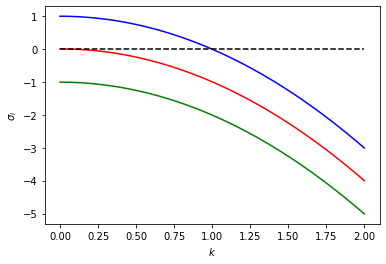

In [13]:
# Plot of growth rates

k_List = np.linspace(0.0, 2.0, 100)
zero_list = np.zeros(100)
sigma1 = vect_sigma1_model_C(k_List, 1)
sigma2_nematic    = vect_sigma2_model_C(k_List, -1, 0.01 )
sigma2_isotropic = vect_sigma2_model_C(k_List, 1, 0.01 )

plt.plot(k_List, sigma1, 'r')
plt.plot(k_List, sigma2_isotropic, 'g')
plt.plot(k_List, sigma2_nematic, 'b')
plt.plot(k_List, zero_list, 'k--')

plt.xlabel(r"$k$")
plt.ylabel(r"$\sigma_i$")

plt.show()


## Fig1B: Square well

In [14]:
# Growth rates
def m0(rho0):
    value = (5.0/6.0) * np.pi**2 * rho0 + (4.0/3.0)* np.pi
    return(value)

def m1(T, rho0, lambda_integer):
    if(lambda_integer > 1):
        value = 2.0 * (b0 + (c2*f2 + g2)/T + 3.0 * b1 * rho0)
    else:
        value = 2.0 * (b0 + (a0 + 3.0 * a1*rho0)/T + 3.0 * b1 * rho0)
    return(value)

def omega(T, rho0, lambda_integer, sigma_SW):
    value = T *sigma_SW *( m0(rho0) + m1(T, rho0, lambda_integer)/T )
    return(value)

def R(T, rho0, lambda_integer, sigma_SW):
    gamma_rho = 1.0
    gamma_s   = 1.0
    kappa     = 1.0

    value = gamma_rho * omega(T, rho0, lambda_integer, sigma_SW)/ (gamma_s * kappa)
    return(value)


def sigma1_SW(k, T, rho0, lambda_integer, sigma_SW):
   sigma = - R(T, rho0, lambda_integer, sigma_SW) * k**2
   return(sigma)

def sigma2_SW(k, r, c0):
    sigma = -c0 -r/abs(r) -k**2
    return(sigma)

vect_sigma1_model_C =  np.vectorize(sigma1_model_C)

vect_sigma2_model_C =  np.vectorize(sigma2_model_C)


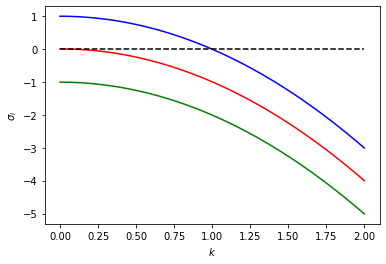

In [15]:
# Plot of growth rates

k_List = np.linspace(0.0, 2.0, 100)
zero_list = np.zeros(100)
sigma1 = vect_sigma1_model_C(k_List, 1)
sigma2_nematic    = vect_sigma2_model_C(k_List, -1, 0.01 )
sigma2_isotropic = vect_sigma2_model_C(k_List, 1, 0.01 )

plt.plot(k_List, sigma1, 'r')
plt.plot(k_List, sigma2_isotropic, 'g')
plt.plot(k_List, sigma2_nematic, 'b')
plt.plot(k_List, zero_list, 'k--')

plt.xlabel(r"$k$")
plt.ylabel(r"$\sigma_i$")

plt.show()